In [5]:
import pandas as pd 
def plate_to_list(plate: pd.DataFrame) -> pd.Series:
    s = plate.stack()
    s.index = [f'{row}{col}' for row, col in s.index]
    return s


In [6]:
import pandas as pd 
cts = pd.read_csv('20240909_phagesize_cts.csv', index_col=0)
cts

,1,2,3,4,5,6,7,8
A,16.96,16.81,17.61,13.98,14.71,17.56,16.83,18.03
B,17.92,17.45,18.32,14.49,14.73,17.64,16.96,18.24
C,17.49,17.20,18.21,14.52,14.82,17.57,16.80,18.47
D,17.97,16.97,18.23,14.55,14.67,17.48,17.47,18.46
E,17.70,16.83,18.28,14.43,14.97,17.66,17.24,18.28
F,17.68,17.00,18.12,14.80,14.68,17.48,17.02,18.45
G,17.53,17.05,18.52,14.33,14.68,17.67,17.03,18.07
H,17.52,17.42,17.99,13.74,14.25,17.06,17.04,18.16


In [7]:
import pandas as pd 
meta = pd.read_excel('20240909_phage_size.xlsx')
meta

,Column,Construct,Phage,Size (bp),Ct value,Ct after 1:100
0,1,p823 from Lucas,SpCas9,4274,20.33,26.97
1,2,KM2 from Lucas,GPCR,1150,21.49,28.13
2,3,p281 from Lucas,TadA,897,21.23,27.87
3,4,IscB wildtype phage from Priscilla,IscB,1200,17.24,23.88
4,5,TnpB wildtype phage from Priscilla,TnpB,1200,19.04,25.68
5,6,p231,SpCas9,4274,20.52,27.16
6,7,SIAH1 (undiluted) from iDEC,SIAH1,850,20.61,27.25
7,8,p236.2,OpenCRISPR,4274,21.00,27.64


In [8]:
d = plate_to_list(cts).to_frame().reset_index().rename(columns={'index':'Well', 0:'Cts'})
d['Column'] = d['Well'].apply(lambda x: x[1]).astype(int)
d = d.merge(meta, on='Column', how='left')
d['log2(FC)'] = d['Ct after 1:100'] - d.Cts 
d

,Well,Cts,Column,Construct,Phage,Size (bp),Ct value,Ct after 1:100,log2(FC)
0,A1,16.96,1,p823 from Lucas,SpCas9,4274,20.33,26.97,10.01
1,A2,16.81,2,KM2 from Lucas,GPCR,1150,21.49,28.13,11.32
2,A3,17.61,3,p281 from Lucas,TadA,897,21.23,27.87,10.26
3,A4,13.98,4,IscB wildtype phage from Priscilla,IscB,1200,17.24,23.88,9.90
4,A5,14.71,5,TnpB wildtype phage from Priscilla,TnpB,1200,19.04,25.68,10.97
...,...,...,...,...,...,...,...,...,...
59,H4,13.74,4,IscB wildtype phage from Priscilla,IscB,1200,17.24,23.88,10.14
60,H5,14.25,5,TnpB wildtype phage from Priscilla,TnpB,1200,19.04,25.68,11.43
61,H6,17.06,6,p231,SpCas9,4274,20.52,27.16,10.10
62,H7,17.04,7,SIAH1 (undiluted) from iDEC,SIAH1,850,20.61,27.25,10.21


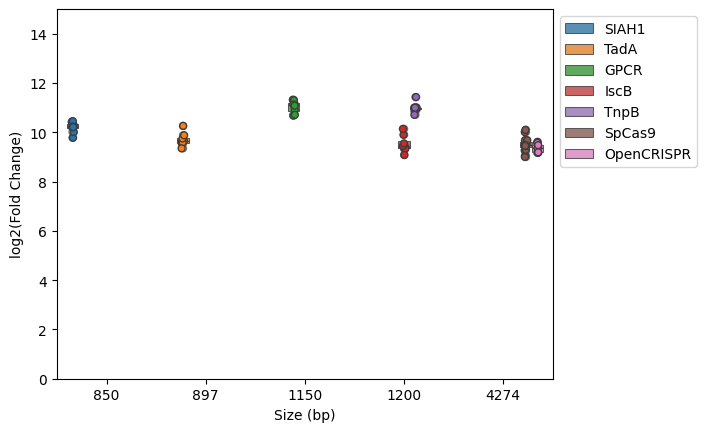

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt
ax = sns.boxenplot(data=d, x='Size (bp)', y='log2(FC)', hue='Phage', alpha=0.8)
ax= sns.stripplot(data=d, x='Size (bp)', y='log2(FC)', hue='Phage', linewidth=1, dodge=True, ax=None, legend=False)
ax.set_ylabel('log2(Fold Change)')
ax.set_ylim(0, 15)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('../figs/20240909_supp_fig2.pdf', format='pdf')